### This tutorial is modified from: https://www.dataquest.io/blog/jupyter-notebook-tutorial/

In [4]:
print('Hello Worl!')

Hello Worl!


In [5]:
import time
time.sleep(5)

In [6]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)
say_hello('EE5020 Students')

'Hello, EE5020 Students!'

# Intro to Markdown (This is a level 1 heading)
## This is a level 2 heading
This is some plain text that forms a paragraph.
Add emphasis via **bold** and __bold__, or *italic* and _italic_.
Paragraphs must be separated by an empty line.

- Sometimes we want to include lists.
    - Which can be indented.


1. Lists can also be numbered.
2. [It is possible to include hyperlinks](https://www.ece.nus.edu.sg/stfpage/motani/)
3. You can add images too: <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/35/Tux.svg/300px-Tux.svg.png" alt="Drawing" style="width: 100px;"/>

In [8]:
import numpy as np
def square(x):
    return x * x

In [12]:
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

9 squared is 81


Let get some data from [Fortune 500](http://archive.fortune.com/magazines/fortune/fortune500_archive/full/2005/) companies spanning over 50 years since the list’s first publication in 1955, put together from Fortune’s public archive. You can get a CSV of the data [at this link](https://s3.amazonaws.com/dq-blog-files/fortune500.csv).



In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [15]:
df = pd.read_csv('fortune500.csv')

In [19]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [20]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [21]:
#Let’s rename those columns so we can refer to them later.
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']

In [22]:
len(df)

25500

In [23]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [27]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


# 就是用N.A.出现的次数*100除以总的条目数

In [ ]:
# How much bad data do we have (Percentage)?
round(100*len(df.profit[non_numberic_profits])/len(df),2)

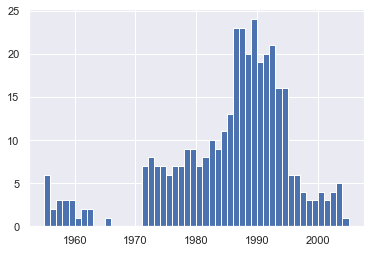

In [26]:
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))

In [28]:
#Let's remove the bad rows
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [30]:
len(df)

25131

In [31]:
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [38]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

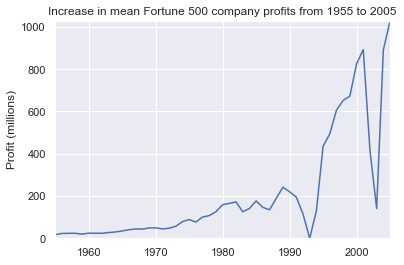

In [39]:
# Let's plot profits
y1 = avgs.profit
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

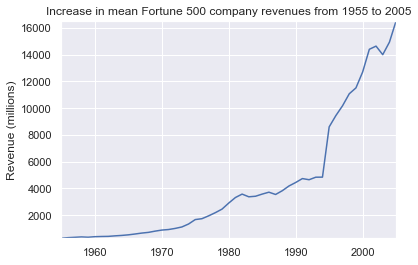

In [40]:
# Let's plot revenues
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')


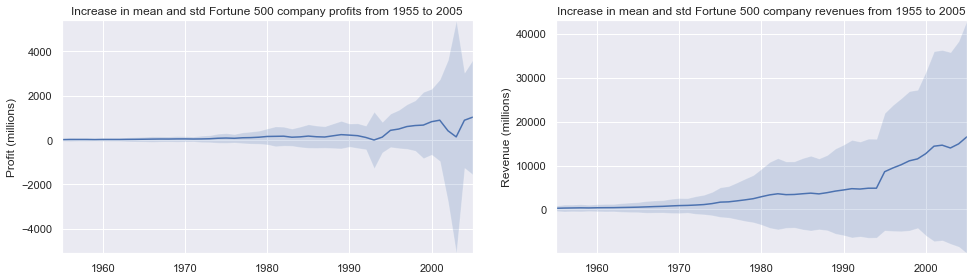

In [26]:
# A more complex plot, code taken from StackOverflow: https://stackoverflow.com/a/47582329/604687
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)

fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()
